In [22]:
from tba_session import session, TEAM_PAGES, ROOT_URL
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
from typing import TypeAlias, Literal
from tba_types import Team
from collections import defaultdict

In [23]:
District: TypeAlias = Literal[
    "fsc",  # FIRST South Carolina
    "fnc",  # FIRST North Carolina
    "ne",  # New England
    "ont",  # Ontario
    "pnw",  # Pacific Northwest
    "fit",  # FIRST in Texas
    "fim",  # FIRST in Michigan
    "fin",  # FIRST in Indiana
    "fma",  # FIRST Mid-Atlantic
    "pch",  # Peach State
    "chs",  # Chesapeake
    "isr",
]

district_to_states: dict[District, list[str]] = {
    "fsc": ["SC", "South Carolina"],
    "fnc": ["NC", "North Carolina"],
    "ne": ["MA", "CT", "NH", "ME", "RI", "VT", "Massachusetts", "Connecticut", "New Hampshire", "Maine", "Rhode Island", "Vermont"],
    "ont": ["ON", "Ontario"],
    "pnw": ["WA", "OR", "AK", "Washington", "Oregon", "Alaska"],
    "fit": ["TX", "NM", "Texas", "New Mexico"],
    "fim": ["MI", "Michigan"],
    "fin": ["IN", "Indiana"],
    "fma": ["PA", "NJ", "DE", "Pennsylvania", "New Jersey", "Delaware"],
    "pch": ["GA", "Georgia"],
    "chs": ["VA", "MD", "DC", "Virginia", "Maryland", "District of Columbia"],
}

region_to_states: dict[str, list[str]] = {
    **district_to_states,
    "CA": ["CA", "California"],  # California
    "NY": ["NY", "New York"],  # New York
    "FL": ["FL", "Florida"],  # Florida
    "MN": ["MN", "Minnesota"],  # Minnesota
    "IL": ["IL", "Illinois"],  # Illinois
}

district_to_countries: dict[District, list[str]] = {
    "isr": ["Israel"],
}

region_to_countries: dict[str, list[str]] = {
    **district_to_countries,
}

district_to_first_year: dict[District, int] = {
    "fsc": 2025,
    "chs": 2016,
    "isr": 2017,
    "pch": 2016,
    "ne": 2015,
    "fma": 2012,
    "fim": 2009,
    "fin": 2015,
    "fnc": 2016,
    "pnw": 2014,
    "ont": 2017,
    "fit": 2019,
}

district_to_name: dict[District, str] = {
    "fsc": "FIRST South Carolina",
    "fnc": "FIRST North Carolina",
    "ne": "New England",
    "ont": "Ontario",
    "pnw": "Pacific Northwest",
    "fit": "FIRST in Texas",
    "fim": "FIRST in Michigan",
    "fin": "FIRST in Indiana",
    "fma": "FIRST Mid-Atlantic",
    "pch": "Peachtree",
    "chs": "Chesapeake",
    "isr": "FIRST Israel",
}

In [24]:
ALL_TEAMS: dict[str, Team] = {}

for page in trange(TEAM_PAGES, desc="Getting Teams", total=TEAM_PAGES):
    team: Team
    for team in session.get(ROOT_URL + f"/teams/{page}").json():
        ALL_TEAMS[team["key"]] = team

teams_that_year: dict[int, dict[str, list[str]]] = {}

for year in trange(2001, 2026, desc="Getting Teams by Year"):
    teams_that_year[year] = defaultdict(list)
    for page in trange(TEAM_PAGES, desc=f"Getting Teams for {year}", leave=False):
        teams: list[str] = session.get(
            ROOT_URL + f"/teams/{year}/{page}/keys"
        ).json()
        for team_key in teams:
            for region, states in region_to_states.items():
                if ALL_TEAMS[team_key]["state_prov"] in states:
                    teams_that_year[year][region].append(team_key)
                    break
            else:
                for region, countries in region_to_countries.items():
                    if ALL_TEAMS[team_key]["country"] in countries:
                        teams_that_year[year][region].append(team_key)
                        break
                else:
                    teams_that_year[year]["Other"].append(team_key)

Getting Teams:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams by Year:   0%|          | 0/25 [00:00<?, ?it/s]

Getting Teams for 2001:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2002:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2003:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2004:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2005:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2006:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2007:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2008:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2009:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2010:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2011:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2012:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2013:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2014:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2015:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2016:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2017:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2018:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2019:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2020:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2021:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2022:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2023:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2024:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2025:   0%|          | 0/22 [00:00<?, ?it/s]

In [25]:
attrition: dict[str, dict[int, float]] = defaultdict(dict)

for region in tqdm({*region_to_states, *region_to_countries}, desc="Calculating Attrition"):
    for year in range(2001, 2025):
        this_year_teams = teams_that_year[year][region]
        next_year_teams = teams_that_year[year + 1][region]
        if not this_year_teams:
            continue
        attrition[region][year] = sum(team not in next_year_teams for team in this_year_teams) / len(this_year_teams)

Calculating Attrition:   0%|          | 0/17 [00:00<?, ?it/s]

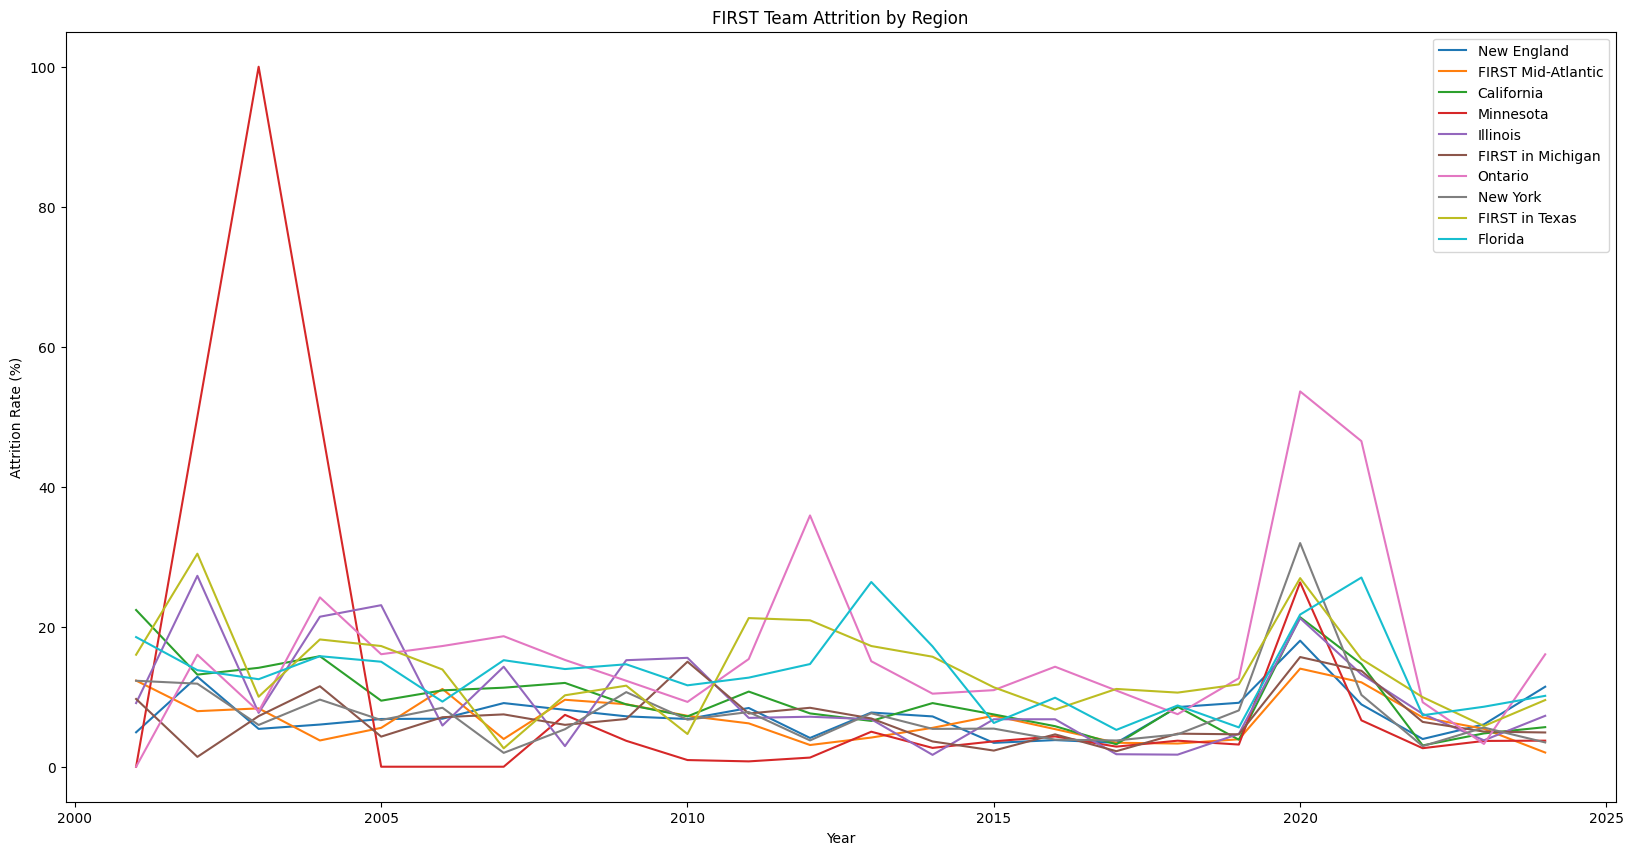

In [27]:
def get_name(region: str) -> str:
    if region in district_to_name:
        return district_to_name[region]
    if region in region_to_states:
        return region_to_states[region][-1]
    if region in region_to_countries:
        return region_to_countries[region][-1]
    return region

to_compare = {"MN", "ne", "fim", "CA", "fma", "fit", "FL", "NY", "IL", "ont"}

plt.rcParams['figure.figsize'] = (20, 10)

for region in to_compare:
    years = sorted(attrition[region].keys())
    values = [attrition[region][year] * 100 for year in years]
    plt.plot(years, values, label=get_name(region))

plt.title("FIRST Team Attrition by Region")
plt.xlabel("Year")
plt.ylabel("Attrition Rate (%)")
plt.legend()

In [ ]:
if "get_ipython" not in globals():
    import json, pathlib

    with (pathlib.Path(__file__).parent / "build" / "attrition.json").open("w") as f:
        json.dump(
            [
                {
                    "region": get_name(region),
                    "year": year,
                    "attrition": attrition[region][year],
                }
                for region in attrition
                for year in attrition[region]
            ],
            f,
            indent=None,
        )

    with (pathlib.Path(__file__).parent / "build" / "attrition.config.json").open("w") as f:
        json.dump(
            {
                "primaryKey": "region",
                "columns": [
                    {"name": "region", "type": "string", "displayName": "Region"},
                    {"name": "year", "type": "integer", "displayName": "Year"},
                    {
                        "name": "attrition",
                        "type": "percentage",
                        "displayName": "Attrition Rate",
                    },
                ],
                "defaultSort": [{"column": "year", "direction": -1}],
                "title": "Attrition by Region",
            },
            f,
            indent=None,
        )